# Electric field normalization

In [8]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH, \
                          FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [9]:
def process_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)
    processed_complex_field_arrays = processed_complex_field_arrays.reshape((SUBFILE_SAMPLES, 128*128*2))    
    return processed_complex_field_arrays

In [10]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_complex_field_arrays = process_fc_complex_field(filepath)

    save_numpy_array(processed_complex_field_arrays,
                    f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}")


In [11]:
processed_complex_field_arrays = process_fc_complex_field(VALIDATION_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)

In [12]:
processed_complex_field_arrays = process_fc_complex_field(TEST_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH)

(128, 128)


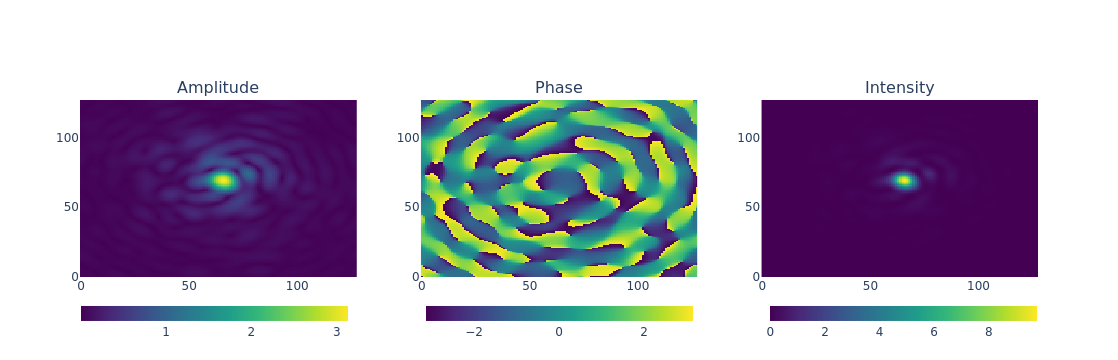

In [17]:
cfs = np.load(FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)
print(cf.shape)
cf = cfs[0].reshape(2, 128, 128)
cf = cf[0] + 1j*cf[1]
plot_amplitude_phase_intensity_from_complex_field(cf, log_scale=False)

# Output fluxes normalization

In [ ]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX, \
                          FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH, \
                          SUBFILE_SAMPLES

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

In [ ]:
def process_output_fuxess(filepath):
    output_fluxes = np.load(filepath)
    norm_fluxes, scaler = normalize_data(output_fluxes)
    
    return norm_fluxes

In [5]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_OUTPUT_FLUXES_FILE_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_output_fluxes_arrays = process_output_fuxess(filepath)

    save_numpy_array(processed_output_fluxes_arrays,
                    f"{FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX}{train_file}{NUMPY_SUFFIX}")

In [8]:
processed_output_fluxes_arrays = process_output_fuxess(VALIDATION_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)

In [9]:
processed_output_fluxes_arrays = process_output_fuxess(TEST_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH)